In [165]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [166]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [167]:
# create the signal 
duration = 10  # seconds
ts = np.linspace(0, duration, duration * 44100)
signal = np.sin(2 * np.pi * 420 * ts)
signal += 0.2 * np.sin(2 * np.pi * 880 * ts)
signal += 0.2 * np.sin(2 * np.pi * 1320 * ts)
signal += 0.2 * np.sin(2 * np.pi * 1760 * ts)
signal += 0.2 * np.sin(2 * np.pi * 2200 * ts)

fs = 44100  # sample frequency in Hz

In [168]:
# Split the signal into chunks
chunk_size = 44100  # 1 second chunks
num_chunks = len(signal) // chunk_size
print("num_chunks", num_chunks)
chunks = np.array(np.split(signal[:num_chunks * chunk_size], num_chunks))

num_chunks 10


In [169]:
pprint(chunks)
chunks.shape


array([[ 0.00000000e+00,  2.33502518e-01,  4.55965990e-01, ...,
        -6.38279754e-01, -4.34517435e-01, -2.10470731e-01],
       [ 2.35351898e-02,  2.56423220e-01,  4.77200764e-01, ...,
        -6.19082271e-01, -4.12864764e-01, -1.87338724e-01],
       [ 4.70591302e-02,  2.79222054e-01,  4.98212256e-01, ...,
        -5.99600094e-01, -3.91017796e-01, -1.64117440e-01],
       ...,
       [ 1.64117440e-01,  3.91017796e-01,  5.99600094e-01, ...,
        -4.98212256e-01, -2.79222054e-01, -4.70591302e-02],
       [ 1.87338724e-01,  4.12864764e-01,  6.19082271e-01, ...,
        -4.77200764e-01, -2.56423220e-01, -2.35351898e-02],
       [ 2.10470731e-01,  4.34517435e-01,  6.38279754e-01, ...,
        -4.55965990e-01, -2.33502518e-01,  1.42210387e-12]])


(10, 44100)

In [170]:
# Compute the FFT for each chunk
fft_chunks = np.array([np.fft.fft(chunk) for chunk in chunks])
fft_chunks.shape

(10, 44100)

In [171]:
# Compute the frequencies for the x-axis
frequencies = np.fft.fftfreq(chunk_size, 1 / fs)
frequencies.shape

(44100,)

In [172]:
# find the dominant frequency
dominant_frequencies = np.abs(fft_chunks)[0].argmax()
dominant_frequencies


420

(10, 22050)


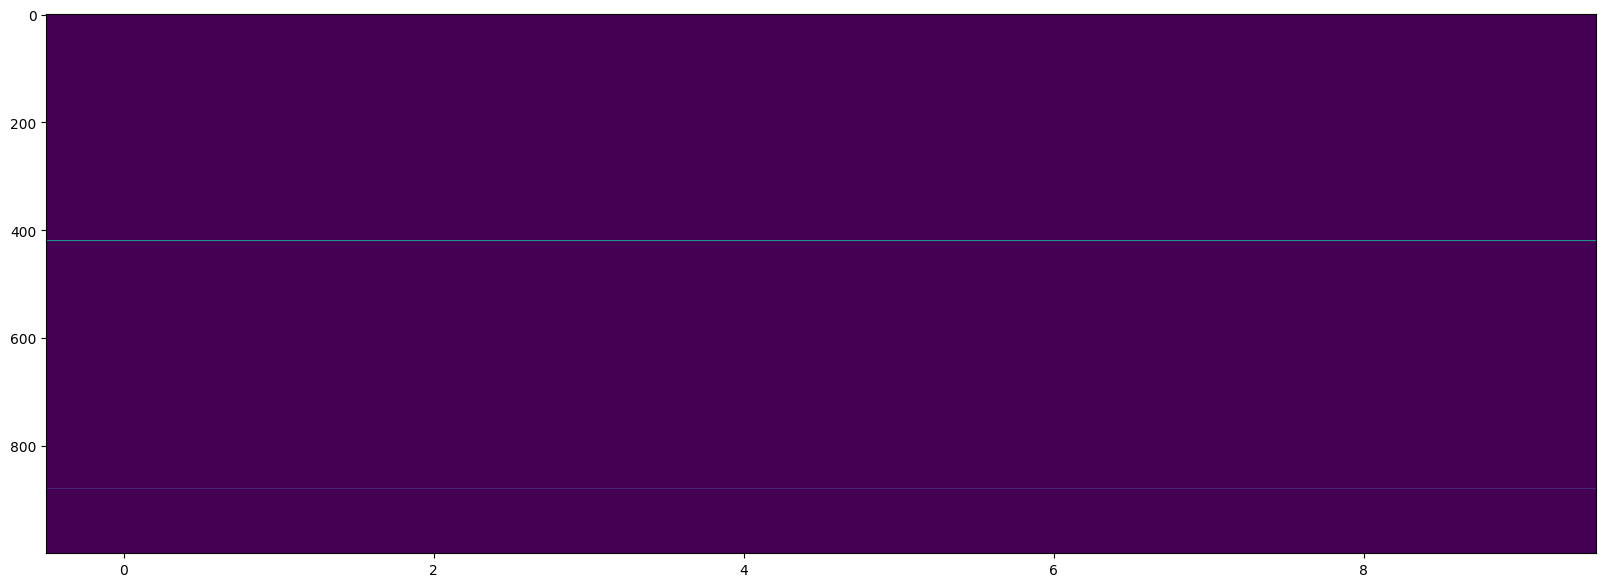

In [173]:
fft_mags = np.abs(fft_chunks)
fft_mags = np.array([fft_mag[:len(fft_mag) // 2] for fft_mag in fft_mags])
print(fft_mags.shape)
frequencies_chunk = frequencies[:len(frequencies) // 2]
fft_mags = fft_mags.T
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[0:1000], aspect='auto')
